<a href="https://colab.research.google.com/github/mdrahmed/whatsapp_chat_analysis/blob/main/Whats_app_chat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import pandas as pd

In [2]:
f = open('/content/_chat.txt', 'r', encoding='utf-8')

In [3]:
data = f.read()

In [6]:
print(data)

[6/8/22, 9:20:05 AM] Rowland Hall Football Friends: ‎Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them.
[4/20/18, 6:30:31 PM] ‪+1 (801) 462‑4588‬: ‎‪+1 (801) 462‑4588‬ created this group
[6/8/22, 9:20:04 AM] Rowland Hall Football Friends: ‎You joined using this group's invite link
[6/8/22, 9:22:33 AM] Mosaddek UofU: Playing Wednesday 6:45 PM

Praneeth 
Deepak
Maitrey 
Shalin
Shreyas
Nikhil 
Vaibhav
Akhil
Ahsan
Murad
Tapan
Anmol
Prajwal (might be late)
Murat 
Akshay
Musaddiq

16 In
[6/8/22, 9:23:12 AM] ~ Abhilash: Playing Wednesday 6:45 PM

Praneeth 
Deepak
Maitrey 
Shalin
Shreyas
Nikhil 
Vaibhav
Akhil
Ahsan
Murad
Tapan
Anmol
Prajwal (might be late)
Murat 
Akshay
Musaddiq
Abhilash

17 In
[6/8/22, 9:34:56 AM] ‪+880 1628‑429306‬: ‎‪+880 1628‑429306‬ joined using this group's invite link
[6/8/22, 9:57:25 AM] ~ Suyash: Playing Wednesday 6:45 PM

Praneeth 
Deepak
Maitrey 
Shalin
Shreyas
Nikhil 
Vaibhav
Akhil
Ahsan
Murad
Tapan
Anmol
Prajw

In [9]:
print(type(data))

<class 'str'>


# Creating DataFrame

In [74]:
# DataFrame should contain 2 columns => messages & date

# regex expression to break the data based on date, the following regex captures everything between the square braces
#pattern = r'^\[(\d{1,2}/\d{1,2}/\d{2}),\s(\d{1,2}:\d{2}:\d{2}\s[AP]M)\]\s~?\s.*?:\s([\s\S]*?)(?=\n\[|$)'
pattern = r'^\[(\d{1,2}/\d{1,2}/\d{2}),\s(\d{1,2}:\d{2}:\d{2}\s[AP]M)\]\s~?\s([^:]+):\s([\s\S]*?)(?=\n\[|$)'


matches = re.finditer(pattern, data, re.MULTILINE)

# Initialize empty lists to store the extracted data
dates = []
times = []
senders = []
messages = []

for match in matches:
    dates.append(match.group(1))  # Add date to dates list
    times.append(match.group(2))  # Add time to times list
    senders.append(match.group(3).strip())  # Remove any whitespace
    messages.append(match.group(4).strip())  # Add cleaned message to messages list

print(f"Date: {dates}")
print(f"Time: {times}")
print("senders:", senders)
print("Message:", messages)

Date: ['6/8/22', '6/8/22', '6/8/22', '6/8/22', '6/8/22', '6/8/22', '6/8/22', '6/8/22', '6/8/22', '6/9/22', '6/9/22', '6/9/22', '6/9/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/10/22', '6/11/22', '6/11/22', '6/11/22', '6/11/22', '6/11/22', '6/11/22', '6/11/22', '6/12/22', '6/12/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/13/22', '6/15/22', '6/15/22', '6/15/22', '6/15/22', '6/15/22', '6/15/22', '6/15/22', '6/15/22', '6/15/22', '6/15/22', '6/17

In [75]:
df = pd.DataFrame({'sender': senders, 'user_message':messages, 'message_date': dates, 'message_time': times}, index=range(len(messages)))
# convert date & time to datetime format
# Combine date and time into datetime column
df['date'] = pd.to_datetime(
    df['message_date'] + ' ' + df['message_time'],
    format='%m/%d/%y %I:%M:%S %p'
)

df.head()

sender                user_message message_date message_time  \
0         Abhilash   Playing Wednesday 6:45 PM       6/8/22   9:23:12 AM   
1           Suyash   Playing Wednesday 6:45 PM       6/8/22   9:57:25 AM   
2  Rahul Reddy Ala   Playing Wednesday 6:45 PM       6/8/22   9:59:14 AM   
3           Aniket   Playing Wednesday 6:45 PM       6/8/22  10:28:41 AM   
4           Akshay  Or play full field 10 v 10       6/8/22  10:29:20 AM   

                 date  
0 2022-06-08 09:23:12  
1 2022-06-08 09:57:25  
2 2022-06-08 09:59:14  
3 2022-06-08 10:28:41  
4 2022-06-08 10:29:20

In [76]:
df.tail()

sender                                       user_message  \
11442             Ola  I thought the officiating wasn’t balanced …if ...   
11443  Ugur Serinturk               Reals first goal was a clear offside   
11444               I                         Sunday 11th May Game @ 17h   
11445        aleriagr            Someone else wanna join this afternoon?   
11446        aleriagr                                   Calling it off!!   

      message_date message_time                date  
11442      5/11/25  10:30:23 AM 2025-05-11 10:30:23  
11443      5/11/25  10:30:59 AM 2025-05-11 10:30:59  
11444      5/11/25  11:28:19 AM 2025-05-11 11:28:19  
11445      5/11/25   1:05:12 PM 2025-05-11 13:05:12  
11446      5/11/25   1:55:51 PM 2025-05-11 13:55:51

In [77]:
df = df.drop(columns=['message_date', 'message_time'])
print(df)

                sender                                       user_message  \
0             Abhilash                          Playing Wednesday 6:45 PM   
1               Suyash                          Playing Wednesday 6:45 PM   
2      Rahul Reddy Ala                          Playing Wednesday 6:45 PM   
3               Aniket                          Playing Wednesday 6:45 PM   
4               Akshay                         Or play full field 10 v 10   
...                ...                                                ...   
11442              Ola  I thought the officiating wasn’t balanced …if ...   
11443   Ugur Serinturk               Reals first goal was a clear offside   
11444                I                         Sunday 11th May Game @ 17h   
11445         aleriagr            Someone else wanna join this afternoon?   
11446         aleriagr                                   Calling it off!!   

                     date  
0     2022-06-08 09:23:12  
1     2022-06-08 09

In [78]:
df.shape

(11447, 3)

In [95]:
# extracting year
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df.head()

sender                user_message                date  year  \
0         Abhilash   Playing Wednesday 6:45 PM 2022-06-08 09:23:12  2022   
1           Suyash   Playing Wednesday 6:45 PM 2022-06-08 09:57:25  2022   
2  Rahul Reddy Ala   Playing Wednesday 6:45 PM 2022-06-08 09:59:14  2022   
3           Aniket   Playing Wednesday 6:45 PM 2022-06-08 10:28:41  2022   
4           Akshay  Or play full field 10 v 10 2022-06-08 10:29:20  2022   

  month  day  hour  minute  
0  June    8     9      23  
1  June    8     9      57  
2  June    8     9      59  
3  June    8    10      28  
4  June    8    10      29

In [94]:
# df.drop(columns='date')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11447 entries, 0 to 11446
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   sender        11447 non-null  object        
 1   user_message  11447 non-null  object        
 2   date          11447 non-null  datetime64[ns]
 3   year          11447 non-null  int32         
 4   month         11447 non-null  object        
 5   day           11447 non-null  int32         
 6   hour          11447 non-null  int32         
 7   minute        11447 non-null  int32         
dtypes: datetime64[ns](1), int32(4), object(3)
memory usage: 536.7+ KB


In [97]:
df['sender'].unique()


array(['Abhilash', 'Suyash', 'Rahul Reddy Ala', 'Aniket', 'Akshay',
       'Aditya', 'Rajit', 'Saurabh Saxena', 'Praneeth', 'Akhil',
       'Prajwal', 'VSHIV', 'Davian One', 'Ananth', 'Kali Cell', 'Aj',
       'Joseph Nishanth J', 'Vishal Ramachandran', 'Shubham',
       'Shubham Dadhich', 'Saurabh', 'Maneesh Reddy',
       'Gautham Rachakonda', 'Sarvii👻', 'Yash Lad', 'prikshit', 'Devansh',
       'Sumanth', 'কবিৰ বৰা', 'Gaurav Durgule', 'Prateek', 'Sugam Arora',
       'Hamza', 'Avijit Hazra', 'Samrat', 'Nick', 'Tejas Ghanekar',
       'Sufiyan Khan', 'Sahaj Chhabra', 'Aniket_Karna_🏹', 'Sukrut',
       'David Teng', 'Ankita Singla', 'Dhruvil Shah', '-', 'Sai Krishna',
       'Aiman Arashid', 'Alfonso', 'Garish Prajapat', 'Parv Jain',
       'Ishaan Kapoor', 'Rahul Vallurupalli', 'Atharv Belsare',
       'Kaushik Reddy', 'Deekshith Lanka', 'Ps', 'Aditya Bhowmik',
       'Aditya Shihorkar', 'Yuvaraj Chesetti', 'Ejaz Ahmed',
       'Pranav Bhatt', 'Vijith Jacob', 'Vamsi', 'Arunabh Roy',


In [98]:
df.isnull().sum()

sender          0
user_message    0
date            0
year            0
month           0
day             0
hour            0
minute          0
dtype: int64

# Analysis

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

df['num'] = pd.Series([1]*len(df))
df.groupby('sender').count()['num']


sender
&υβhαjyθτι~       5
-                10
.                80
Abby              3
Abhilash         17
                 ..
shivahari         2
shivrajhb9193    32
~Kirtijha         6
कलीफा             6
কবিৰ বৰা         22
Name: num, Length: 242, dtype: int64

## People activity based on hour

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128008 (\N{CAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127808 (\N{FOUR LEAF CLOVER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128123 (\N{GHOST}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/p

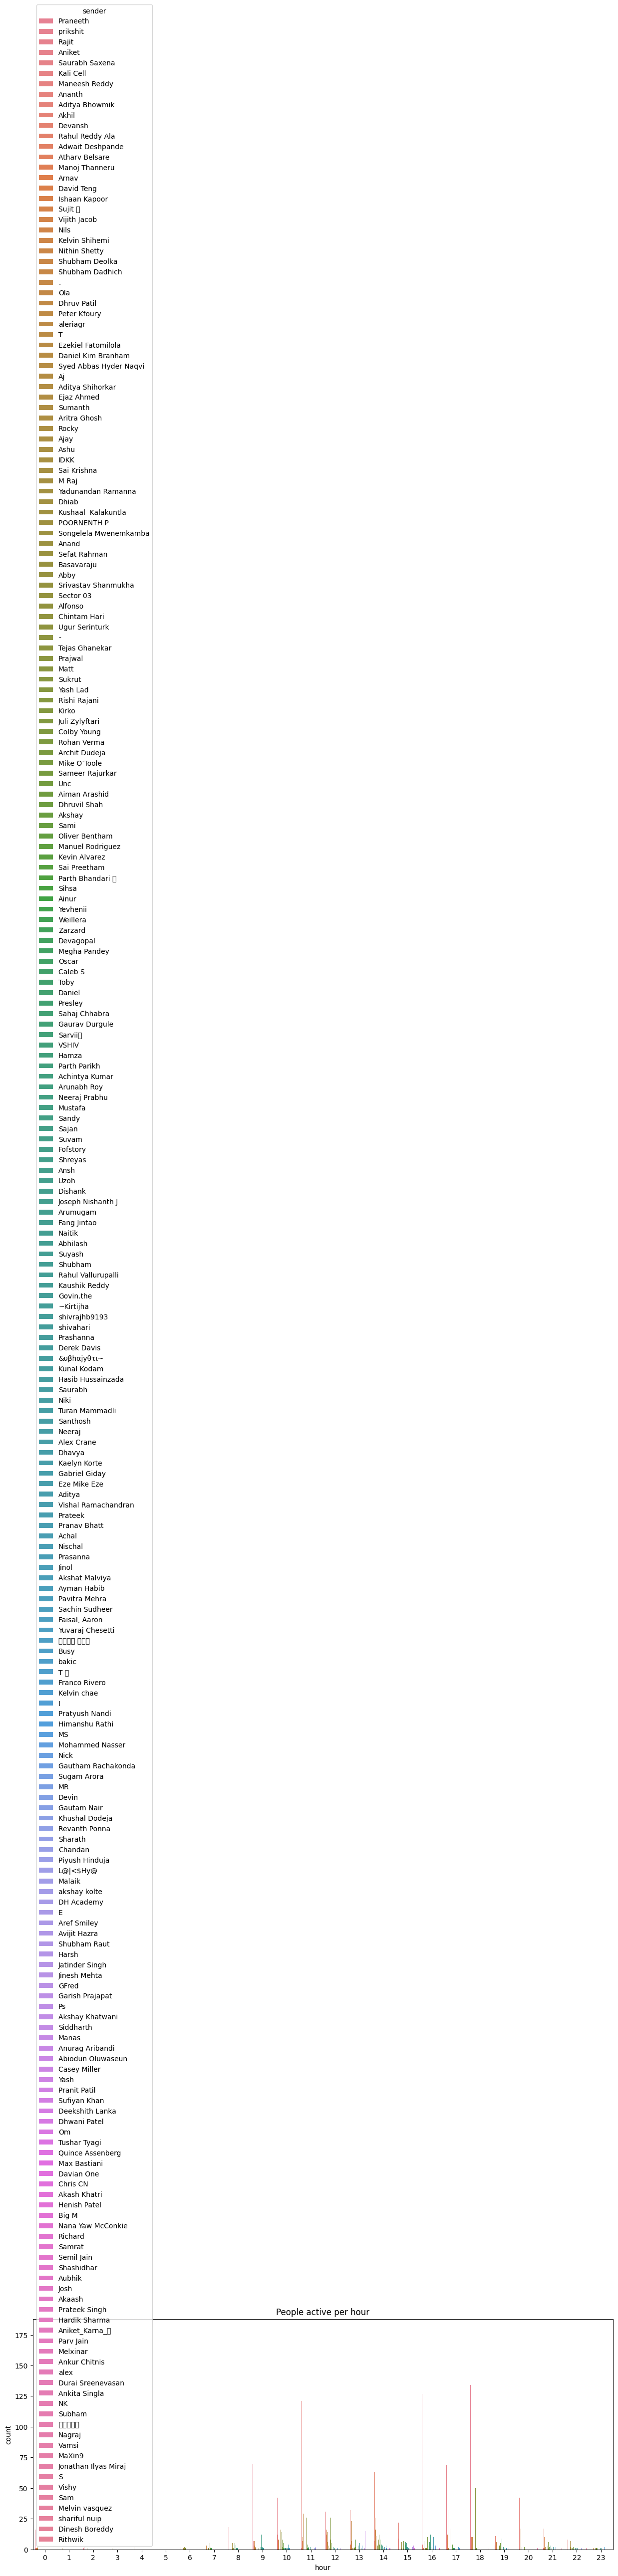

In [106]:
plt.figure(figsize=(15,6))
plt.title('People active per hour')
sns.countplot(x='hour',hue= 'sender', data=df)
plt.show()

## Activity per month

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128123 (\N{GHOST}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2476 (\N{BENGALI LETTER BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/

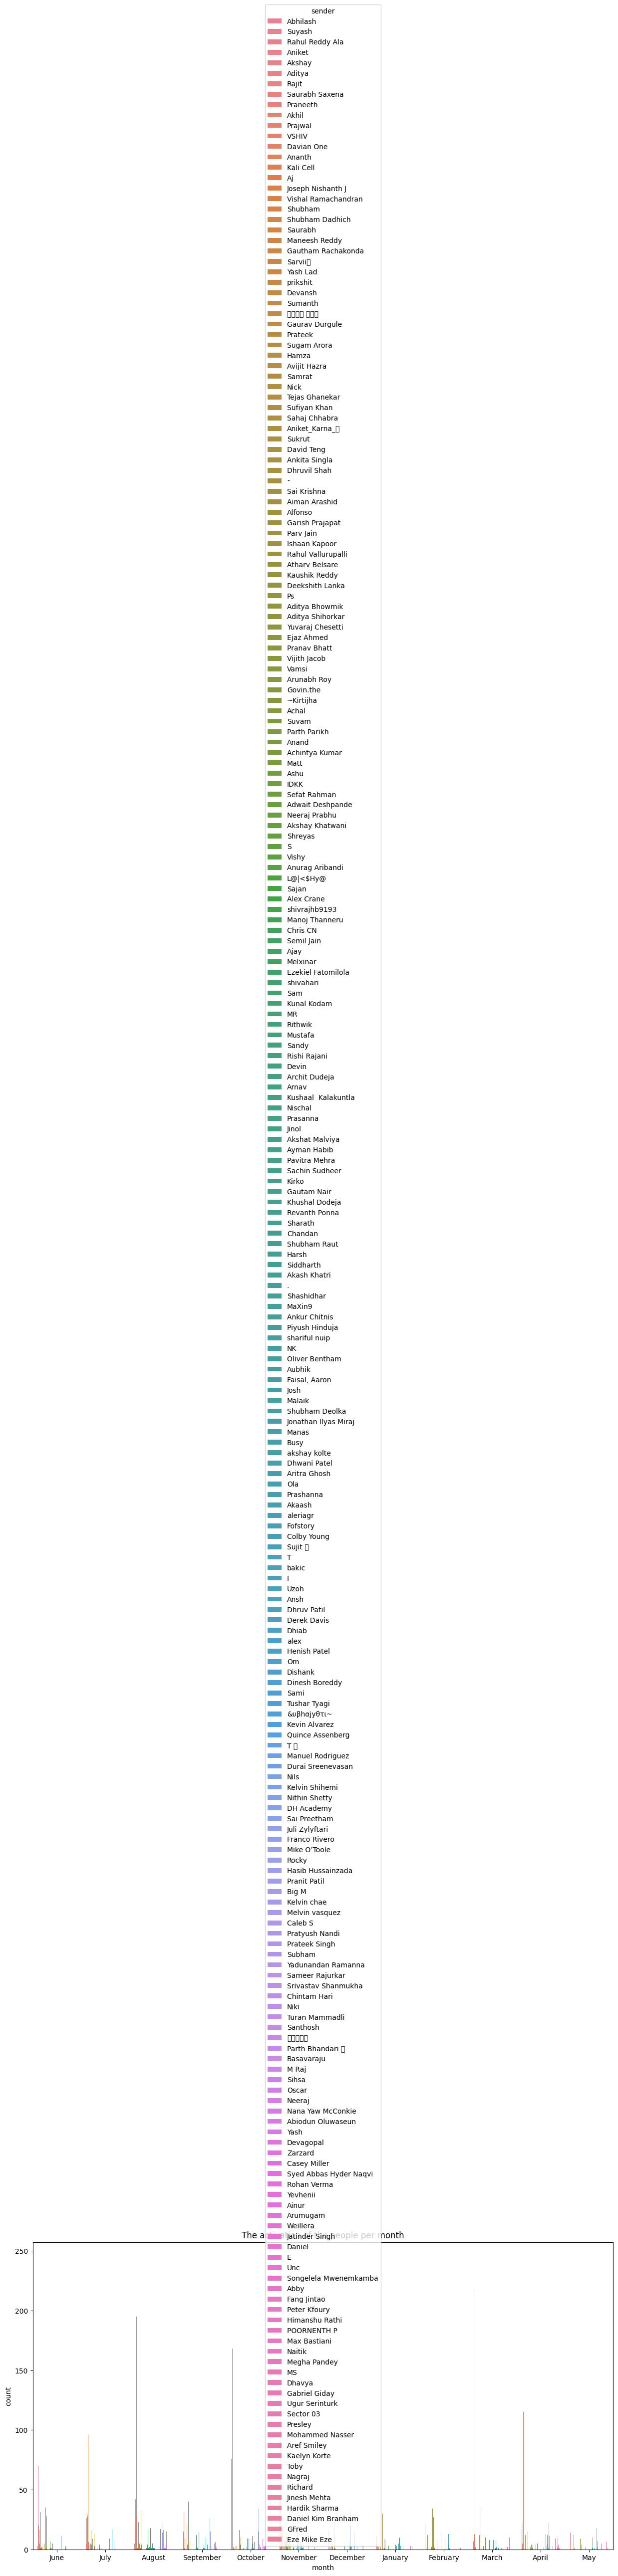

In [107]:
plt.figure(figsize=(15,8))
plt.title('People activity per month')
sns.countplot(x='month', hue='sender', data=df)
plt.show()

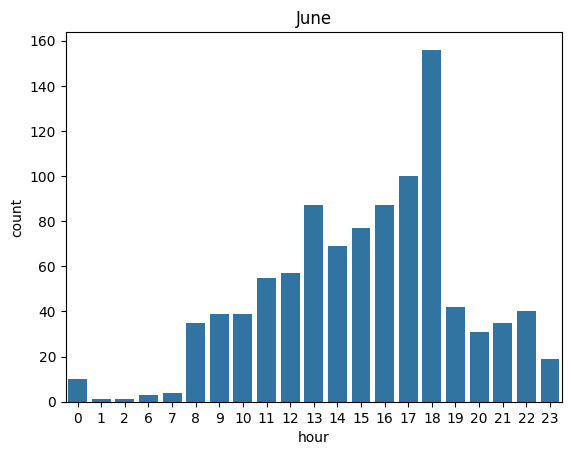

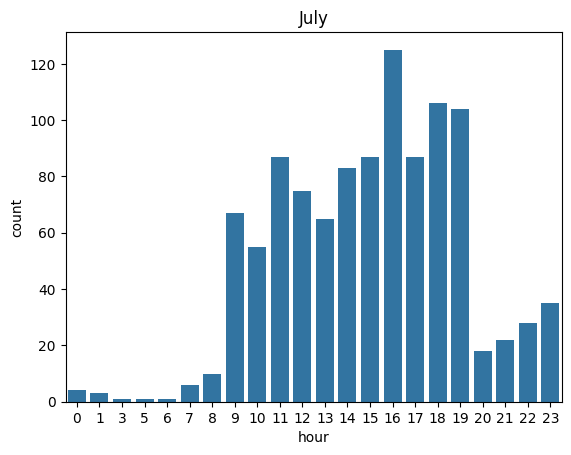

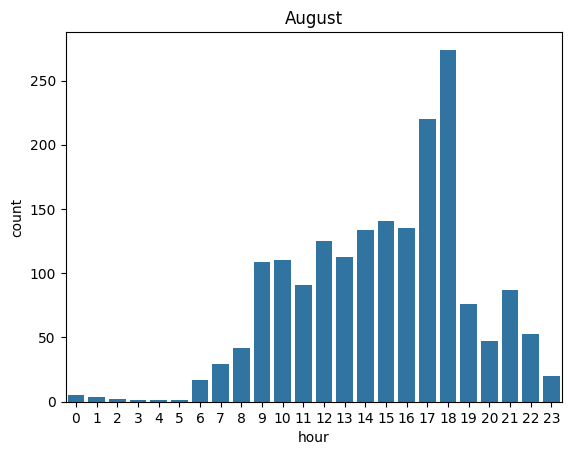

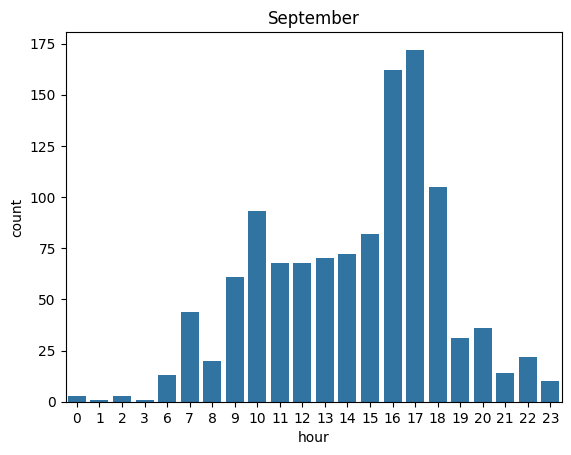

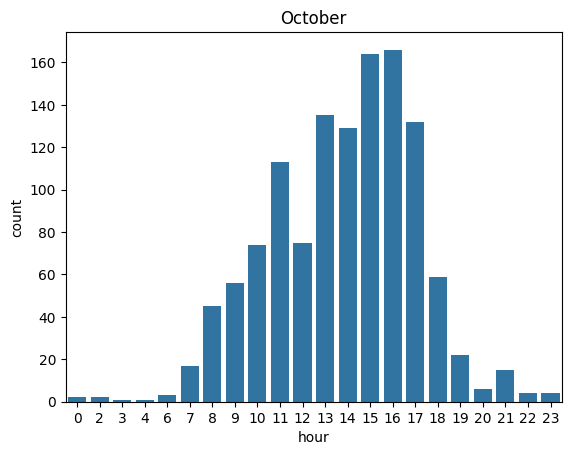

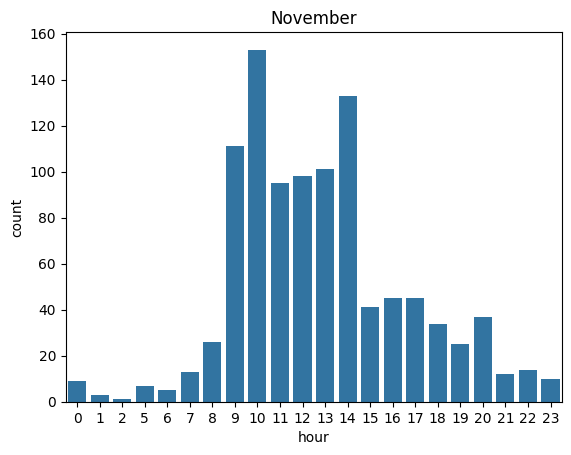

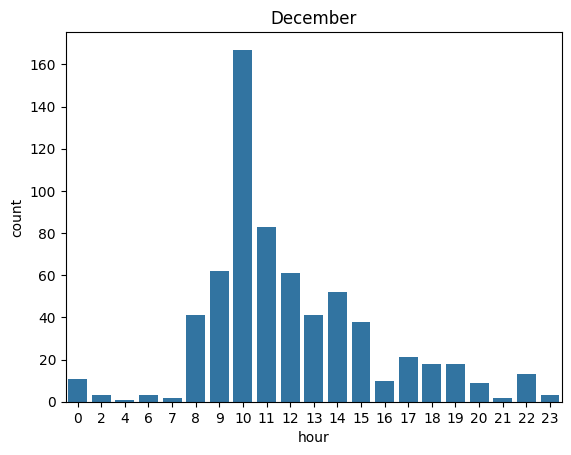

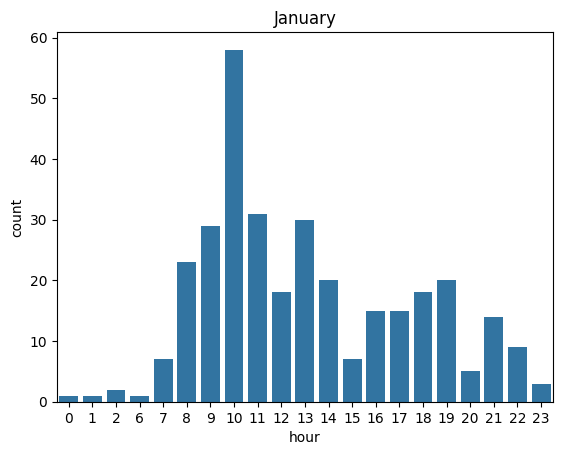

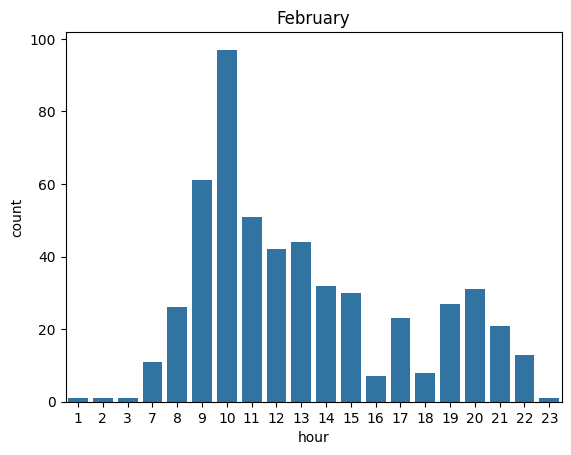

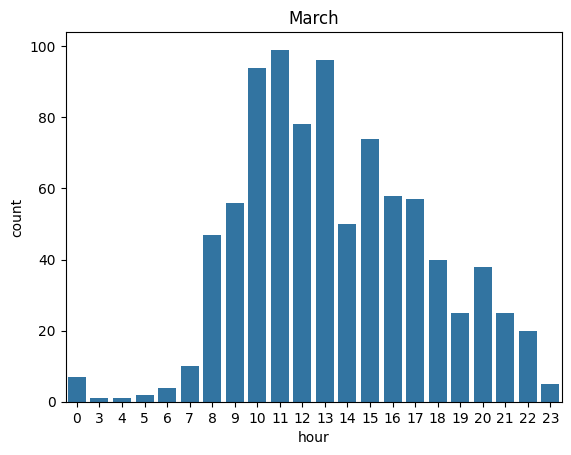

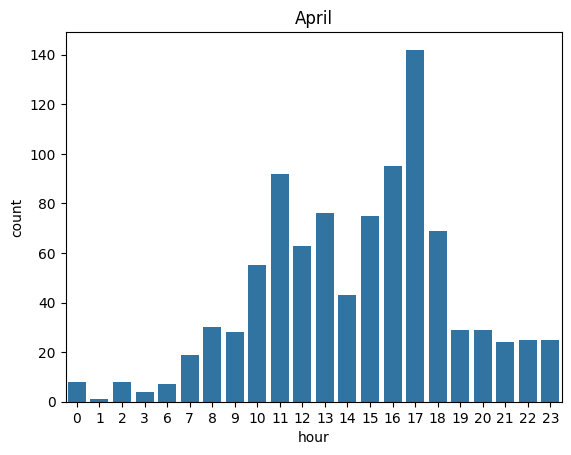

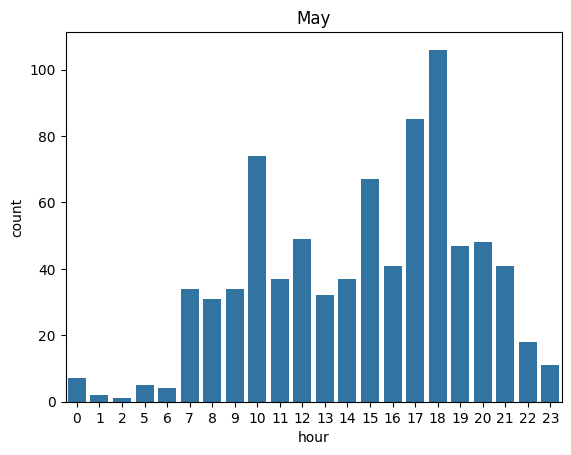

In [110]:
months = df['month'].unique()

for month in months:
    plt.figure()
    sns.countplot(data=df[df["month"] == month], x="hour")
    plt.title(month)
    plt.show()